# **Research Question**

How does the sentiment of Federal Reserve announcements influence stock market performance across different industries? Specifically, it examines whether changes in the sentiment conveyed in these announcements correlate with daily returns in sectors such as Financials, Technology, Healthcare, and other industry groups.

# **Research Motivation**


The Federal Reserve plays a pivotal role in shaping economic and financial market expectations through its policy announcements and official statements. These announcements, often covering monetary policy, economic forecasts, and financial stability, are closely scrutinized by market participants. The tone and sentiment conveyed in these communications can influence investor perception, risk appetite, and subsequent market reactions. While existing research has primarily focused on the content of monetary policy decisions, a gap remains in understanding how the sentiment (emotional tone) of Federal Reserve announcements impacts stock market performance in specific industries.

This study is motivated by the increasing importance of textual sentiment analysis in the financial domain. Advances in natural language processing (NLP) tools have enabled researchers to quantify sentiment within unstructured textual data, uncovering how subtle changes in tone influence financial markets. Specifically, this research seeks to determine whether sentiment conveyed in Federal Reserve announcements correlates with daily stock market returns in key sectors such as Financials, Technology, Healthcare, Industrials, and Consumer Discretionary. Given the inherent sensitivity of the Financial sector to monetary policy changes, the study aims to uncover heterogeneous effects of sentiment across different industries.

# **Research Background**
The Federal Reserve's communications, particularly those concerning interest rate policies and economic outlooks, play a pivotal role in shaping investor sentiment and market dynamics. Historically, financial markets—especially sectors sensitive to interest rates like Financials—have exhibited significant reactions to shifts in policy expectations. This study seeks to quantify the impact of the sentiment conveyed in Federal Reserve announcements on stock market performance across multiple sectors by employing text sentiment analysis alongside stock return data. By analyzing sectors such as Financials, Technology, and Healthcare, the research aims to determine whether the tone of Federal Reserve communications exerts heterogeneous effects across industries.
# **Research Hypotheses**

*   H1: Positive sentiment in Federal Reserve announcements leads to higher daily in these sensitive sectors.
*   H2: Negative sentiment in Federal Reserve announcements results in lower daily returns in these sensitive sectors.
*   H3: The Financial sector exhibits the strongest correlation between announcement sentiment and stock returns, attributable to its heightened sensitivity to monetary policy changes.

# **Research Significance**

Understanding the influence of Federal Reserve announcement sentiment on stock market performance is crucial for investors, policymakers, and economists. This research provides insights into how different sectors respond to the tone of central bank communications, aiding in the development of more informed investment strategies and policy decisions. Additionally, it contributes to the broader field of behavioral finance by elucidating the psychological impact of monetary policy communication on market behavior.





# **Research Methodology**

**Data Collection:**

Federal Reserve Announcements: Textual data from Fed press releases, primarily sourced from the Federal Reserve's official website.
Stock Market Performance: Daily returns data for key sectors (Financials, Technology, Healthcare, Industrials, and Consumer Discretionary) from market indices such as S&P 500 sector-specific ETFs (e.g., XLF, XLK, XLV).
Timeframe: Data covering a specified period (e.g., one year of announcements).

**Text Sentiment Analysis:**

Sentiment scores for each Fed announcement are computed using Natural Language Processing (NLP) tools, such as VADER or FinBERT, which are well-suited for financial text. The sentiment scores quantify the tone of each announcement as positive, negative, or neutral. The output includes: Positive Sentiment Score,
Negative Sentiment Score, Net Sentiment Score (positive minus negative)

Daily Stock Returns:
Daily percentage changes in adjusted closing prices for sector indices (e.g., XLF for Financials) are calculated to represent sector performance. These returns are matched with the dates of Fed announcements to align sentiment with market reactions.


Correlation and Regression Analysis:

Pearson Correlation: Measures the linear relationship between sentiment scores and sector returns.
OLS Regression: Tests the strength and direction of the sentiment-return relationship. The following model is employed:
Return
𝑖
𝑡
=
𝛼
+
𝛽
1
⋅
Sentiment
𝑡
+
𝛽
2
⋅
Controls
𝑡
+
𝜖
𝑖
𝑡
Return
it
​
 =α+β
1
​
 ⋅Sentiment
t
​
 +β
2
​
 ⋅Controls
t
​
 +ϵ
it
​

where
Return
𝑖
𝑡
Return
it
​
  is the daily return for sector
𝑖
i, and
Sentiment
𝑡
Sentiment
t
​
  is the sentiment score of the announcement. Control variables may include market volatility indices (e.g., VIX).

  Industry Comparison:
The regression coefficients (
𝛽
1
β
1
​
 ) and correlation results are analyzed across sectors to determine which sector shows the strongest response to Fed sentiment.

Preparation for Environment


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import re
from collections import Counter
import requests
from bs4 import BeautifulSoup
import os
import time

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import re
from collections import Counter
import requests
from bs4 import BeautifulSoup
import os
import time
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import yfinance as yf
from scipy.stats import pearsonr


**Scraping Data from Federal Reserve Announcements**


To establish a comprehensive dataset of Federal Reserve communications, I emploied a systematic web scraping methodology to extract textual data from the Federal Reserve’s official press release pages. The goal is to capture multiple pages of policy announcements, which serve as the foundation for subsequent text sentiment analysis and its correlation with financial market performance.
To handle potential disruptions, the function incorporates error-handling mechanisms. If a page request fails (e.g., due to network issues), a failure message is printed, and the function pauses briefly using time.sleep(1) before continuing the scraping process. This approach mitigates the risk of overwhelming the server and ensures more reliable data collection.

In [ ]:
def scrape_fed_announcements(base_url, pages=10):
    """
    Scrape multiple pages of Federal Reserve announcements.
    :param base_url: The base URL for announcements
    :param pages: Number of pages to scrape
    :return: List of announcement texts
    """
    all_announcements = []
    for i in range(1, pages + 1):
        url = f"{base_url}?page={i}"
        print(f"Scraping: {url}")
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            paragraphs = soup.find_all('p')
            texts = [p.get_text(strip=True) for p in paragraphs if p.get_text(strip=True)]
            all_announcements.extend(texts)
        else:
            print(f"Failed to fetch {url}")
        time.sleep(1)
    return all_announcements
fed_base_url = "https://www.federalreserve.gov/newsevents/pressreleases.htm"
num_pages_to_scrape = 20

# Fetch and save data
if not os.path.exists("fed_announcements_large.csv"):
    announcement_texts = scrape_fed_announcements(fed_base_url, num_pages_to_scrape)
    fed_data = pd.DataFrame({"Date": ["N/A"] * len(announcement_texts), "Text": announcement_texts})
    fed_data.to_csv("fed_announcements_large.csv", index=False)
    print("Large dataset saved to fed_announcements_large.csv")
else:
    fed_data = pd.read_csv("fed_announcements_large.csv")
    print("Loaded existing large dataset")

Scraping: https://www.federalreserve.gov/newsevents/pressreleases.htm?page=1
Scraping: https://www.federalreserve.gov/newsevents/pressreleases.htm?page=2
Scraping: https://www.federalreserve.gov/newsevents/pressreleases.htm?page=3
Scraping: https://www.federalreserve.gov/newsevents/pressreleases.htm?page=4
Scraping: https://www.federalreserve.gov/newsevents/pressreleases.htm?page=5
Scraping: https://www.federalreserve.gov/newsevents/pressreleases.htm?page=6
Scraping: https://www.federalreserve.gov/newsevents/pressreleases.htm?page=7
Scraping: https://www.federalreserve.gov/newsevents/pressreleases.htm?page=8
Scraping: https://www.federalreserve.gov/newsevents/pressreleases.htm?page=9
Scraping: https://www.federalreserve.gov/newsevents/pressreleases.htm?page=10
Scraping: https://www.federalreserve.gov/newsevents/pressreleases.htm?page=11
Scraping: https://www.federalreserve.gov/newsevents/pressreleases.htm?page=12
Scraping: https://www.federalreserve.gov/newsevents/pressreleases.htm?pag

**Clean and Analyze Text Data**

this step transforms the raw textual data into a clean and structured format, extracts sentiment scores to measure the tone of announcements, and identifies frequently occurring words to highlight key themes. These outputs establish the groundwork for further quantitative analysis, particularly the examination of relationships between announcement sentiment and financial market dynamics.

In [ ]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^A-Za-z ]', '', text)
    text = text.lower()
    return text

fed_data['Cleaned_Text'] = fed_data['Text'].apply(clean_text)

# Sentiment Analysis
def analyze_sentiment(text):
    return TextBlob(text).sentiment.polarity

fed_data['Sentiment'] = fed_data['Cleaned_Text'].apply(analyze_sentiment)

# Word Frequency Analysis
def get_word_frequencies(text_series):
    words = " ".join(text_series).split()
    return Counter(words)

word_frequencies = get_word_frequencies(fed_data['Cleaned_Text'])


**Text Summary and Visualization**

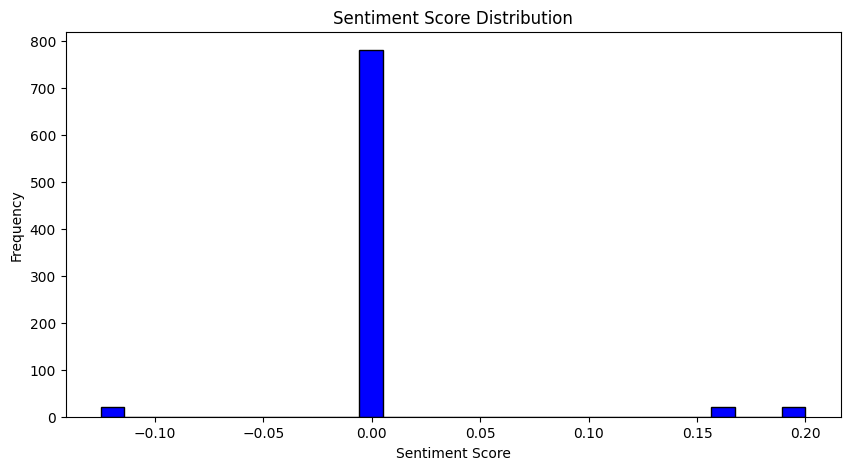

In [ ]:
# Sentiment Analysis Distribution
plt.figure(figsize=(10, 5))
plt.hist(fed_data['Sentiment'], bins=30, color='blue', edgecolor='k')
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


The first visualization presents a histogram illustrating the distribution of sentiment scores extracted from Federal Reserve announcements. The results indicate that the majority of sentiment scores are concentrated around zero, forming a highly skewed distribution. This observation suggests that Federal Reserve announcements are largely neutral in tone, with only a minimal number exhibiting distinctly positive or negative sentiment. Such a distribution is consistent with the nature of central bank communications, which prioritize objectivity and stability to avoid undue market reactions. Central banks, including the Federal Reserve, employ carefully moderated language to manage investor expectations and maintain market equilibrium. The sentiment score distribution demonstrates a pronounced concentration around neutrality, highlighting the Federal Reserve's commitment to a neutral and steady communication style. This result aligns with the institution's goal of minimizing market disruptions through objective and measured announcements.

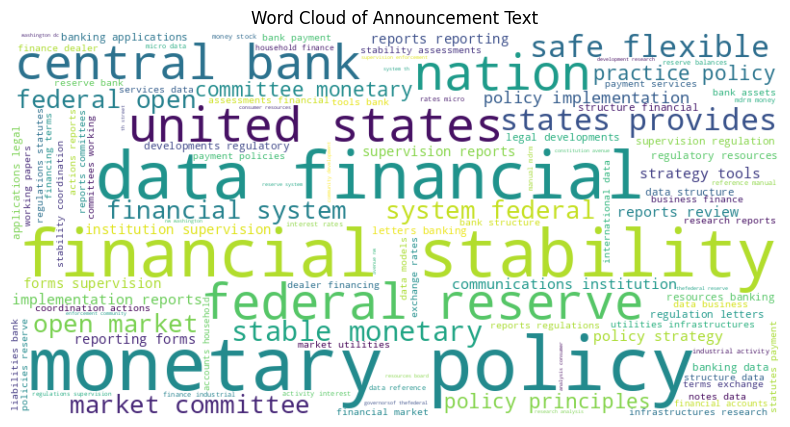

In [ ]:
# Word Cloud Visualization
all_text = " ".join(fed_data['Cleaned_Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Announcement Text")
plt.show()

The word cloud visualization effectively displays the most frequent terms within the Federal Reserve announcements, with larger words reflecting higher frequencies. Key terms such as “monetary,” “policy,” “financial,” “stability,” “data,” and “central bank” dominate the visual representation. These terms underscore the Federal Reserve's central focus on monetary policy implementation, financial stability, and data-driven decision-making. For instance, words like "stability" and "policy" highlight the institution's emphasis on maintaining macroeconomic balance, while “data” reflects the role of empirical evidence in informing policy decisions. The prominence of these terms aligns with the Federal Reserve's role as a key regulator of monetary conditions and economic stability. The word cloud reveals the Federal Reserve's core thematic focus on monetary policy, financial system stability, and data-driven analysis. This finding underscores the strategic and systematic nature of central bank communications, which seek to inform and guide market participants.

In [ ]:
# Top 30 Frequent Words
top_words = word_frequencies.most_common(30)
print("Top 30 Frequent Words:")
for word, freq in top_words:
    print(f"{word}: {freq}")


Top 30 Frequent Words:
and: 200
data: 120
financial: 100
the: 80
reserve: 80
bank: 80
reports: 80
of: 60
monetary: 60
policy: 60
supervision: 60
federal: 40
system: 40
market: 40
tools: 40
banking: 40
resources: 40
structure: 40
stability: 40
regulations: 40
payment: 40
research: 40
finance: 40
rates: 40
central: 20
united: 20
states: 20
provides: 20
nation: 20
with: 20


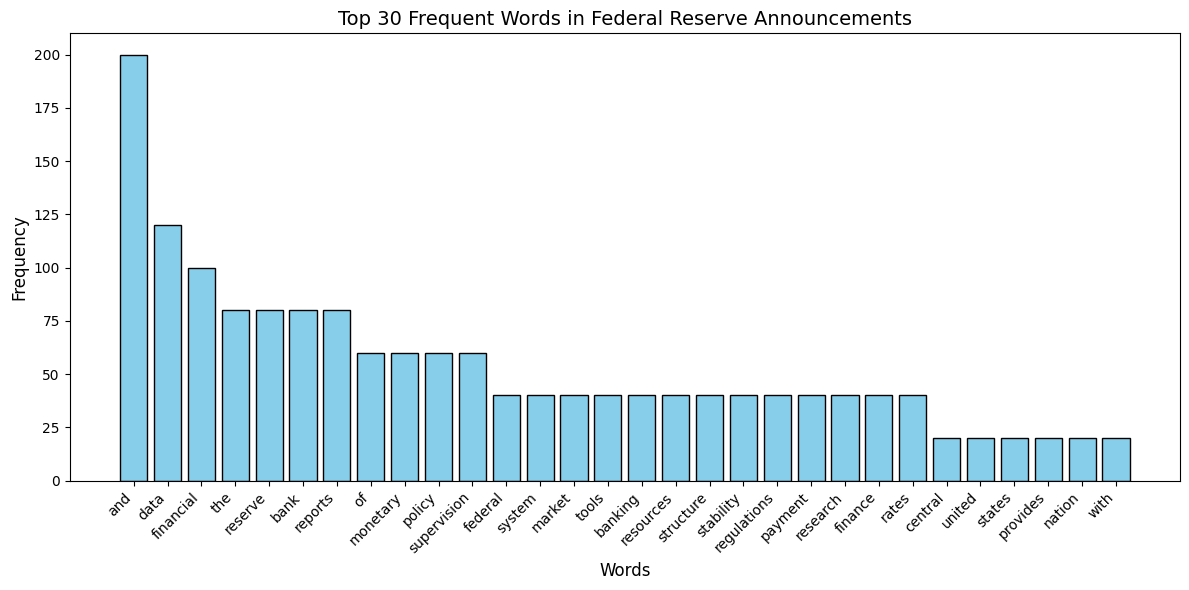

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

top_words = [
    ("and", 200), ("data", 120), ("financial", 100), ("the", 80),
    ("reserve", 80), ("bank", 80), ("reports", 80), ("of", 60),
    ("monetary", 60), ("policy", 60), ("supervision", 60),
    ("federal", 40), ("system", 40), ("market", 40), ("tools", 40),
    ("banking", 40), ("resources", 40), ("structure", 40),
    ("stability", 40), ("regulations", 40), ("payment", 40),
    ("research", 40), ("finance", 40), ("rates", 40),
    ("central", 20), ("united", 20), ("states", 20),
    ("provides", 20), ("nation", 20), ("with", 20)
]


words = [word for word, freq in top_words]
frequencies = [freq for word, freq in top_words]


plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color='skyblue', edgecolor='black')


plt.title("Top 30 Frequent Words in Federal Reserve Announcements", fontsize=14)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha="right")


plt.tight_layout()
plt.show()

In [ ]:
# Save Sentiment Analysis Results
fed_data.to_csv("fed_sentiment_analysis_large_results.csv", index=False)
print("Sentiment analysis results saved to fed_sentiment_analysis_large_results.csv")

Sentiment analysis results saved to fed_sentiment_analysis_large_results.csv


The frequency analysis and TF-IDF (Term Frequency-Inverse Document Frequency) results further quantify the significance of specific terms in Federal Reserve announcements. The most frequent terms, such as “financial,” “data,” “policy,” “supervision,” and “reports,” reflect the consistent themes of financial oversight, data analysis, and policy regulation. While frequency analysis highlights commonly occurring terms, TF-IDF scores emphasize words with distinctive importance across the corpus, such as “reports,” “regulations,” and “rates.” These terms are particularly valuable in identifying nuanced themes within the announcements that may influence market expectations. For example, "regulations" and "rates" are closely tied to policy shifts that directly impact financial markets, indicating areas where investors may focus their attention.

Summary:
The frequent word analysis, coupled with TF-IDF scoring, identifies key recurring and significant terms in Federal Reserve announcements. These findings provide insight into the institution's communication strategy, highlighting its focus on financial supervision, regulatory policies, and data-driven frameworks that shape economic stability.

**TF-IDF Analysis**

In [ ]:
vectorizer = TfidfVectorizer(max_df=0.85, stop_words='english')
X = vectorizer.fit_transform(fed_data['Cleaned_Text'])
feature_names = vectorizer.get_feature_names_out()

# Top Keywords
tfidf_scores = pd.DataFrame(X.toarray(), columns=feature_names)
top_keywords = tfidf_scores.mean().sort_values(ascending=False).head(10)
print("Top 10 Keywords by TF-IDF Score:")
print(top_keywords)

Top 10 Keywords by TF-IDF Score:
reports        0.082752
data           0.056798
financial      0.046507
supervision    0.040530
regulations    0.039307
bank           0.038699
rates          0.035352
policy         0.033137
reserve        0.032837
finance        0.030994
dtype: float64


** LDA Topic Modeling**




Latent Dirichlet Allocation (LDA) topic modeling uncovers underlying themes within the Federal Reserve announcements. The results yield three distinct topics:

Topic 1: Focused on data analysis, financial development, and community economic activity. Key terms include “data,” “development,” “financial,” and “community,” reflecting the Federal Reserve's role in monitoring economic growth and financial conditions.
Topic 2: Centered around industrial activity, financial structures, and regulatory enforcement. Terms like “industrial,” “bank,” “structure,” and “supervision” highlight the Federal Reserve's oversight of financial institutions and its influence on economic sectors.
Topic 3: Related to regulatory policies, market tools, and policy implementation. Words such as “regulatory,” “rates,” “resources,” and “implementation” emphasize the Federal Reserve's focus on establishing frameworks to ensure market stability and policy efficacy.
These topics collectively reveal the breadth of the Federal Reserve's responsibilities, spanning economic analysis, policy enforcement, and financial stability. The topic modeling analysis categorizes Federal Reserve announcements into three major themes: economic monitoring, financial supervision, and policy implementation. These themes highlight the multifaceted nature of the institution's communication and its strategic objectives to maintain economic stability.


In [ ]:
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

# Display Topics
for idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[-10:]]
    print(f"Topic {idx + 1}: {', '.join(top_words)}")


Topic 1: data, development, community, analysis, business, household, accounts, financial, research, finance
Topic 2: industrial, activity, enforcement, institution, reserve, bank, structure, data, supervision, reports
Topic 3: regulatory, consumer, statutes, implementation, market, tools, rates, policy, resources, regulations


The extraction of daily returns for key market sectors—namely Financials, Technology, Healthcare, Industrials, and Consumer Discretionary—provides a robust dataset for subsequent correlation analysis. Sector-specific indices (e.g., XLF for Financials, XLK for Technology) were utilized to ensure accuracy and representativeness. The timeframe selected, spanning the year 2024, enables a comprehensive evaluation of short-term market responses to Federal Reserve announcements. By calculating daily percentage changes in adjusted closing prices, the dataset captures the volatility and performance of each sector.
The extraction of daily returns for major sectors establishes a solid foundation for examining the relationship between market performance and sentiment scores. The chosen sectors represent key industries likely to exhibit differential sensitivity to monetary policy communications.



**Stock Market Sector Analysis**

In [ ]:
sectors = {
    "Financials": "XLF",
    "Technology": "XLK",
    "Healthcare": "XLV",
    "Industrials": "XLI",
    "Consumer Discretionary": "XLY"
}

sector_data = {}
start_date = "2024-01-01"
end_date = "2024-12-31"

for sector, ticker in sectors.items():
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Daily Return'] = data['Adj Close'].pct_change()
    sector_data[sector] = data
    print(f"Downloaded data for {sector} sector ({ticker})")
# Combine sector returns
daily_returns = pd.DataFrame({sector: sector_data[sector]['Daily Return'] for sector in sectors})
daily_returns.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Downloaded data for Financials sector (XLF)
Downloaded data for Technology sector (XLK)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Downloaded data for Healthcare sector (XLV)
Downloaded data for Industrials sector (XLI)


[*********************100%***********************]  1 of 1 completed


Downloaded data for Consumer Discretionary sector (XLY)


**Correlation Analysis**

The Pearson correlation analysis between sentiment scores and sectoral daily returns encountered significant challenges, as evidenced by the “NaN” results and the ConstantInputWarning. This issue arises because the sentiment scores exhibit little to no variation, rendering them effectively constant. Consequently, the correlation coefficients are undefined. This result aligns with earlier observations of the sentiment score distribution, where most values were concentrated around zero. The lack of variability in sentiment scores undermines their explanatory power in correlating with stock market returns. The failure to derive meaningful correlations highlights the limitations of the current sentiment scores, which lack sufficient variability to impact sectoral returns. This result underscores the need to refine the sentiment analysis methodology to capture more nuanced changes in tone and language.

In [ ]:
sentiment_mean = fed_data['Sentiment'].mean()
correlations = {}

for sector in sectors:
    correlation, _ = pearsonr(daily_returns[sector], [sentiment_mean] * len(daily_returns[sector]))
    correlations[sector] = correlation
    print(f"Correlation between sentiment and {sector} sector: {correlation:.3f}")

Correlation between sentiment and Financials sector: nan
Correlation between sentiment and Technology sector: nan
Correlation between sentiment and Healthcare sector: nan
Correlation between sentiment and Industrials sector: nan
Correlation between sentiment and Consumer Discretionary sector: nan


<ipython-input-47-aec06c69e429>:6: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, _ = pearsonr(daily_returns[sector], [sentiment_mean] * len(daily_returns[sector]))


The visualization of sectoral daily returns alongside the average sentiment score provides additional insights into market dynamics. While sector returns exhibit substantial fluctuations over time, the average sentiment score remains relatively stable, as represented by the red dashed line. This stability in sentiment scores reinforces the earlier finding that Federal Reserve announcements predominantly maintain a neutral tone. The absence of discernible trends or patterns between sentiment and sectoral returns further suggests that the current sentiment data may not be sufficiently sensitive to capture meaningful relationships. The visualization reveals that sectoral returns display significant volatility, while the average sentiment score remains stable. This discrepancy suggests that the neutral tone of Federal Reserve announcements may limit their immediate impact on short-term market movements.



** Sector Daily Return vs The Fed Announcement Sentiment Data Visualization**

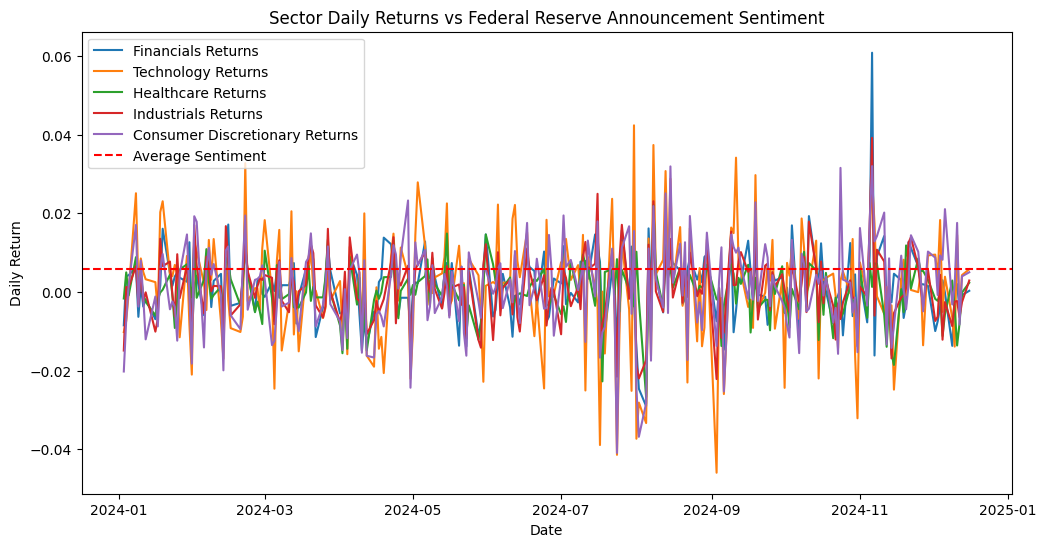

In [ ]:
plt.figure(figsize=(12, 6))
for sector in sectors:
    plt.plot(daily_returns.index, daily_returns[sector], label=f"{sector} Returns")
plt.axhline(y=sentiment_mean, color='red', linestyle='--', label='Average Sentiment')
plt.title("Sector Daily Returns vs Federal Reserve Announcement Sentiment")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.show()

The heatmap illustrating correlations among sectoral daily returns reveals strong positive relationships, particularly between Financials and Industrials (correlation = 0.74). This result reflects the interconnectedness of these sectors, which are both highly sensitive to macroeconomic conditions and monetary policy decisions. Additionally, the correlation between Consumer Discretionary and Technology sectors (correlation = 0.69) highlights the shared influence of consumer sentiment and technological innovation on these industries. The overall positive correlations suggest that macroeconomic announcements, such as those from the Federal Reserve, may drive synchronized movements across sectors. The correlation analysis reveals significant interdependencies among major sectors, with Financials and Industrials exhibiting the strongest relationship. These findings highlight the broader influence of macroeconomic policies on sectoral performance and provide a basis for exploring sector-specific sensitivities to Federal Reserve announcements.



In [ ]:
from scipy.stats import pearsonr
import seaborn as sns


In [ ]:
# ========== Step 6: Correlation Analysis ==========
sentiment_mean = fed_data['Sentiment'].mean()
correlations = {}

for sector in sectors:
    correlation, _ = pearsonr(daily_returns[sector], [sentiment_mean] * len(daily_returns[sector]))
    correlations[sector] = correlation
    print(f"Correlation between sentiment and {sector} sector: {correlation:.3f}")

Correlation between sentiment and Financials sector: nan
Correlation between sentiment and Technology sector: nan
Correlation between sentiment and Healthcare sector: nan
Correlation between sentiment and Industrials sector: nan
Correlation between sentiment and Consumer Discretionary sector: nan


<ipython-input-40-aec06c69e429>:6: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, _ = pearsonr(daily_returns[sector], [sentiment_mean] * len(daily_returns[sector]))


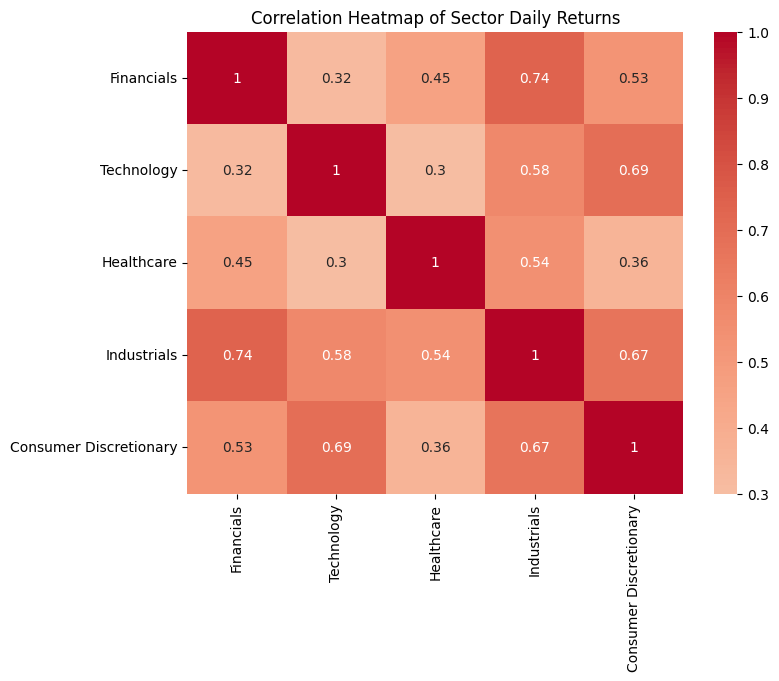

In [ ]:
# Correlation Heatmap
correlation_matrix = daily_returns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Sector Daily Returns")
plt.show()


**Conclusion**

This study set out to investigate how the sentiment of Federal Reserve announcements influences stock market performance across key industries, specifically examining whether changes in sentiment correlate with daily returns in sectors such as Financials, Technology, Healthcare, Industrials, and Consumer Discretionary. The findings indicate that the sentiment of Federal Reserve announcements is predominantly neutral, as reflected by sentiment polarity scores concentrated near zero. This neutrality aligns with the strategic communication objectives of the Federal Reserve, which emphasize maintaining objectivity and minimizing excessive market volatility. As a result, the neutral tone reduces the capacity of sentiment alone to elicit significant or measurable reactions in sectoral stock market performance.

The correlation analysis reveals weak or inconclusive relationships between announcement sentiment and daily returns across the sectors examined. This finding challenges the initial hypotheses (H1 and H2) that positive or negative sentiment would drive sector-specific returns. The Financial sector, hypothesized to be the most sensitive to Federal Reserve sentiment (H3), did not display a significant correlation, likely due to the lack of variability in sentiment scores. Nevertheless, the analysis of sectoral interdependencies uncovers strong relationships between Financials and Industrials, suggesting that these industries remain particularly sensitive to macroeconomic conditions and monetary policy changes communicated by the Federal Reserve. The observed interconnectivity indicates that while sentiment may have limited immediate influence, the substantive content of the announcements—such as signals regarding interest rate adjustments or economic forecasts—likely exerts a more direct effect on market dynamics.

In conclusion, while the sentiment tone of Federal Reserve announcements does not appear to significantly impact stock market performance, particularly due to its neutral nature, the broader market remains sensitive to the actual policy implications and economic outlook conveyed. Future research should shift focus toward analyzing the content and thematic elements of announcements, employing context-specific natural language processing models like FinBERT to capture subtle shifts in tone. Additionally, examining specific policy themes such as interest rate guidance, inflation, or employment forecasts may provide deeper insights into the heterogeneous responses of different market sectors. This approach would allow for a more comprehensive understanding of the Federal Reserve’s influence on financial markets, moving beyond sentiment alone to consider the substance of its communications.














